In [2]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras import Sequential
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 
import random
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import os
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.applications.vgg19 import VGG19


# Создание датасета

In [23]:
train_path = r"C:\EMOJI"
batch_size = 25 #Размер выборки
img_width = 96 #Ширина изображения
img_height = 96 #Высота изображения

In [24]:
#Генератор изображений
datagen = ImageDataGenerator(
    rescale=1. / 255, #Значения цвета меняем на дробные показания
    rotation_range=10, #Поворачиваем изображения при генерации выборки
    width_shift_range=0.1, #Двигаем изображения по ширине при генерации выборки
    height_shift_range=0.1, #Двигаем изображения по высоте при генерации выборки
    zoom_range=0.1, #Зумируем изображения при генерации выборки
    horizontal_flip=True, #Включаем отзеркаливание изображений
    fill_mode='nearest', #Заполнение пикселей вне границ ввода
    validation_split=0.1 #Указываем разделение изображений на обучающую и тестовую выборку
)

In [25]:
# обучающая выборка
train_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки
    shuffle=True, #Перемешивание выборки
    subset='training' # устанавливаем как набор для обучения
)

# проверочная выборка
validation_generator = datagen.flow_from_directory(
    train_path, #Путь ко всей выборке выборке
    target_size=(img_width, img_height), #Размер изображений
    batch_size=batch_size, #Размер batch_size
    class_mode='categorical', #Категориальный тип выборки
    shuffle=True, #Перемешивание выборки
    subset='validation' # устанавливаем как валидационный набор
)

Found 30059 images belonging to 9 classes.
Found 3335 images belonging to 9 classes.


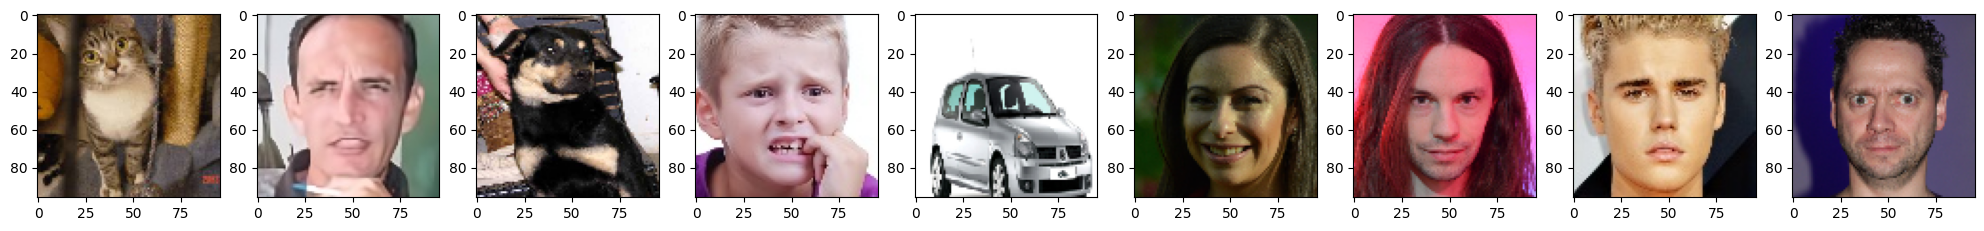

In [26]:
#Выводим для примера картинки по каждому классу
fig, axs = plt.subplots(1, 9, figsize=(25, 5)) #Создаем полотно из 10 графиков
for i in range(9): #Проходим по всем классам
  car_path = train_path + '/' + os.listdir(train_path)[i] + '/'#Формируем путь к выборке
  img_path = car_path + random.choice(os.listdir(car_path)) #Выбираем случайное фото для отображения
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width))) #Отображение фотографии

plt.show() #Показываем изображения

In [27]:
print(train_generator.class_indices)

{'Ferrari': 0, 'cats': 1, 'disgust': 2, 'dogs': 3, 'fear': 4, 'happy': 5, 'neutral': 6, 'sad': 7, 'surprise': 8}


# Создание нейросети

In [28]:
#Создаем последовательную модель
model = Sequential()
model.add(Conv2D(64, (7, 7), padding='same', activation='relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2000, activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2000, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 96, 96, 64)        9472      
                                                                 
 conv2d_9 (Conv2D)           (None, 96, 96, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        102464    
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 32, 32, 64)        36928     
                                                      

# Обучение

In [39]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs=20,
    verbose=1
)

C:\Users\Александр\AppData\Local\Temp\ipykernel_13692\301212809.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
1202/1202 [==============================] - 924s 769ms/step - loss: 1.5845 - accuracy: 0.3243 - val_loss: 1.3694 - val_accuracy: 0.3609
Epoch 2/20
1202/1202 [==============================] - 921s 766ms/step - loss: 1.1581 - accuracy: 0.4817 - val_loss: 1.2679 - val_accuracy: 0.4767
Epoch 3/20
1202/1202 [==============================] - 900s 749ms/step - loss: 1.0062 - accuracy: 0.5644 - val_loss: 1.1039 - val_accuracy: 0.5359
Epoch 4/20
1202/1202 [==============================] - 845s 703ms/step - loss: 0.9136 - accuracy: 0.6100 - val_loss: 1.0152 - val_accuracy: 0.5850
Epoch 5/20
1202/1202 [==============================] - 845s 703ms/step - loss: 0.8705 - accuracy: 0.6319 - val_loss: 1.0461 - val_accuracy: 0.6033
Epoch 6/20
1202/1202 [==============================] - 960s 798ms/step - loss: 0.8279 - accuracy: 0.6472 - val_loss: 0.9248 - val_accuracy: 0.6226
Epoch 7/20
1202/1202 [==============================] - 954s 794ms/step - loss: 0.7953 - accuracy: 0.6620 - val_

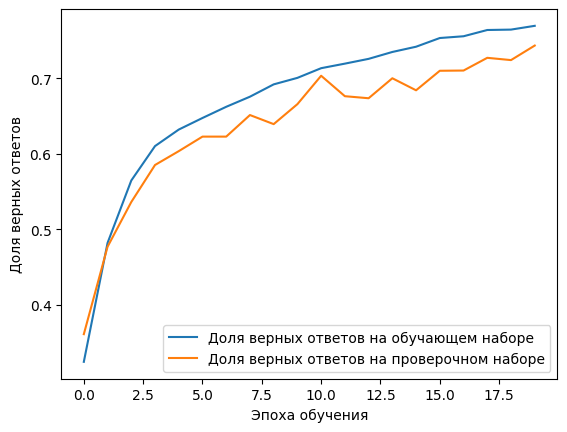

In [40]:
#Оображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# Тестирование

In [41]:
def photo_to_smile(path, model):
    prediction2=-1
    prediction3=-1
    k=1
    img =  image.load_img(path, target_size=(96, 96))
    img_batch=[]
    for i in range(25):
        img_batch.append(img)
    a=model.predict(np.asarray(img_batch))[0]
    prediction1 = np.argmax(a)
    a=list(a)
    a.pop(prediction1)
    prediction2 = np.argmax(a)
    if prediction2 == 0:
        prediction2 =-1
    else:
        a.pop(prediction2)
        prediction3 = np.argmax(a)
    pred=[]
    pred.append(pred_to_smile(prediction1))
    if prediction2>0:
        k+=1
        pred.append(pred_to_smile(prediction2))
    if prediction3>0:
        k+=1
        pred.append(pred_to_smile(prediction3))
    if k!=1:
        fig, ax = plt.subplots(1, k)
        for i  in range(0,k):
            ax[i].imshow(pred[i])
    else:
        plt.imshow(pred[0])
            
    plt.show()

In [42]:
def pred_to_smile(p):
    for i in range(0, 10):
        if p==i:
            path0=get_key(train_generator.class_indices, i)
            #print(path0)
            return image.load_img(path0 + '.png', target_size=(96,96))

In [43]:
def get_key(d, val):
    for k, v in d.items():
        if v==val:
            return k

1/1 [==============================] - 0s 232ms/step


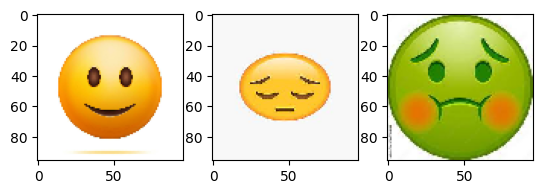

In [48]:
photo_to_smile('happy_girl.png', model)